In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the train and test file to the Python environment**

In [2]:
data_train = pd.read_csv('/content/train_ctrUa4K.csv')
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data_test = pd.read_csv('/content/test_lAUu6dG.csv')
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
data_test_copy = data_test.copy()
data_train_copy = data_train.copy()

**Exploratory Data Analysis  - on train dataset**

In [ ]:
data_train.shape

(614, 13)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Checking the histogram and boxplot for numerical values

Skew: 6.54


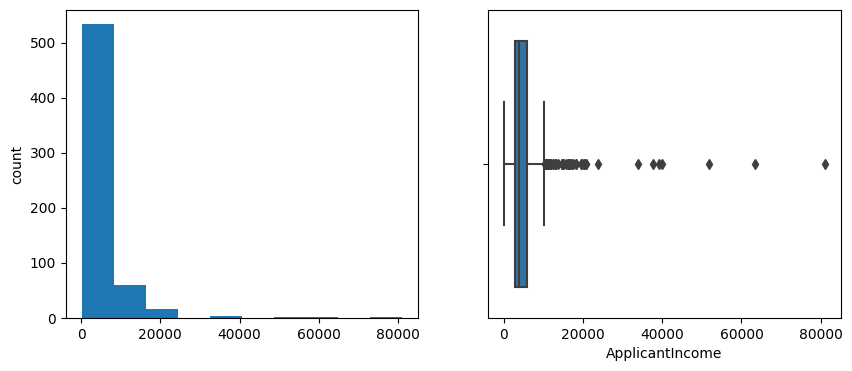

Skew: 7.49


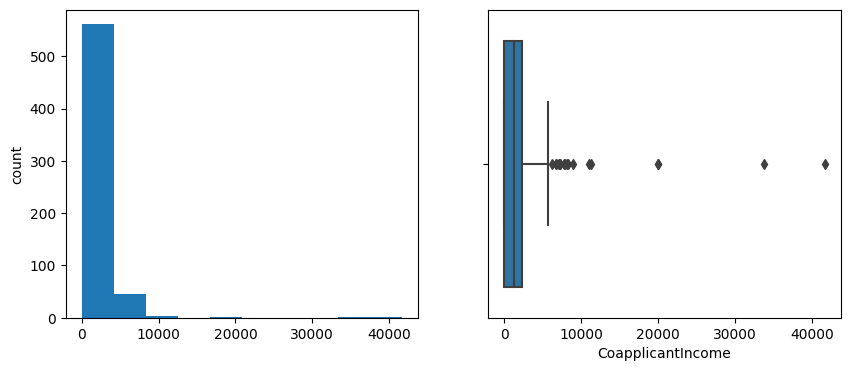

Skew: 2.68


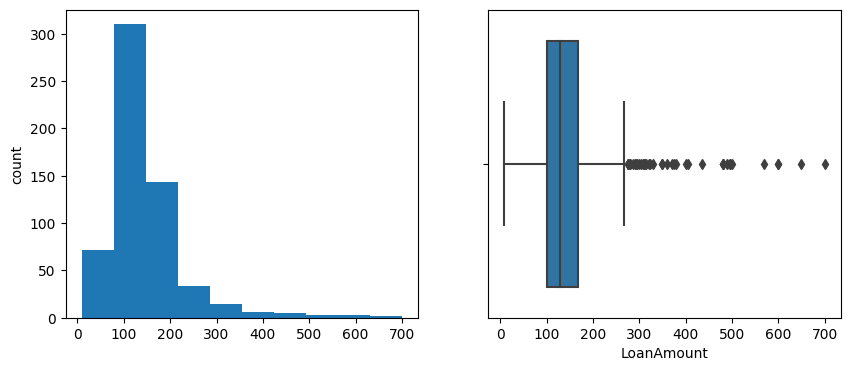

Skew: -2.36


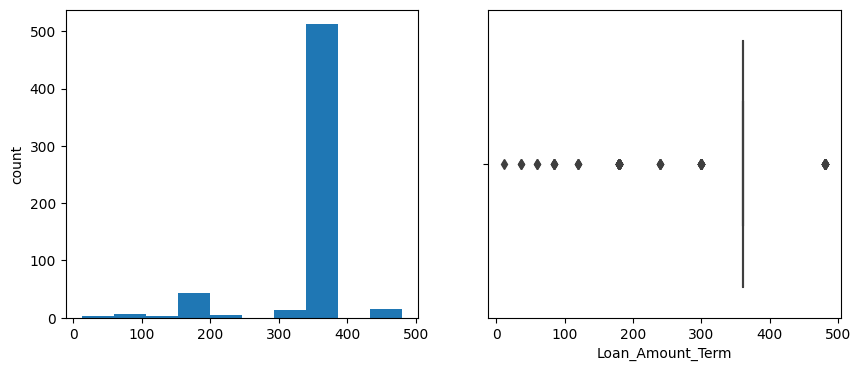

Skew: -1.88


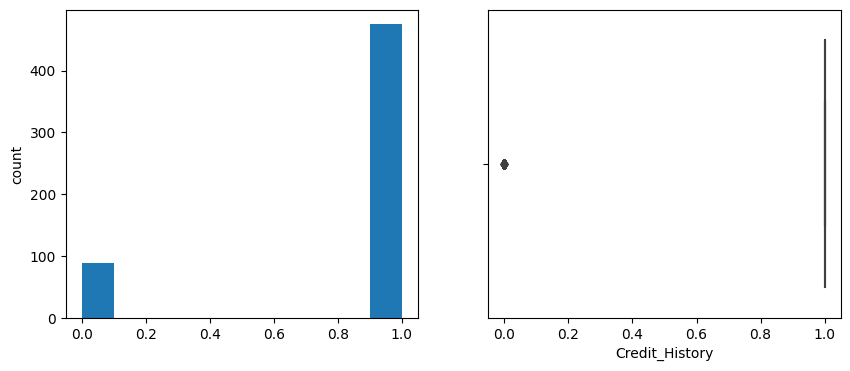

In [ ]:
num_col = data_train.select_dtypes(exclude =["object"]).columns
for col in num_col:
  print('Skew:',round(data_train[col].skew(),2))
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  data_train[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=data_train[col])
  plt.show()

**Exploratary Data Analysis - Test Data**

In [ ]:
data_test.shape

(367, 12)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
data_test.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [ ]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
data_train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Skew: 8.44


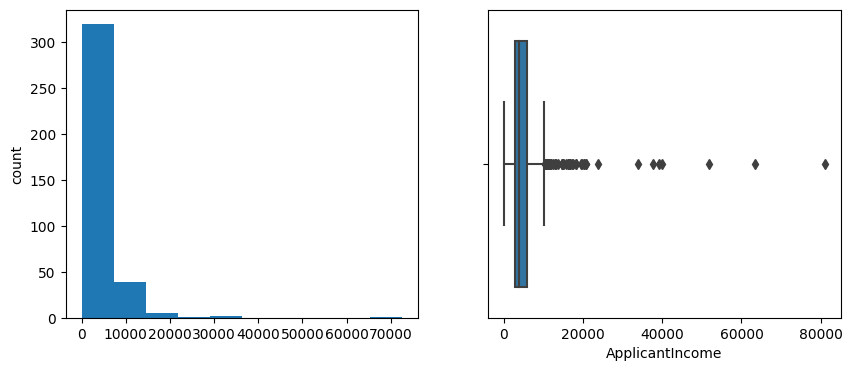

Skew: 4.26


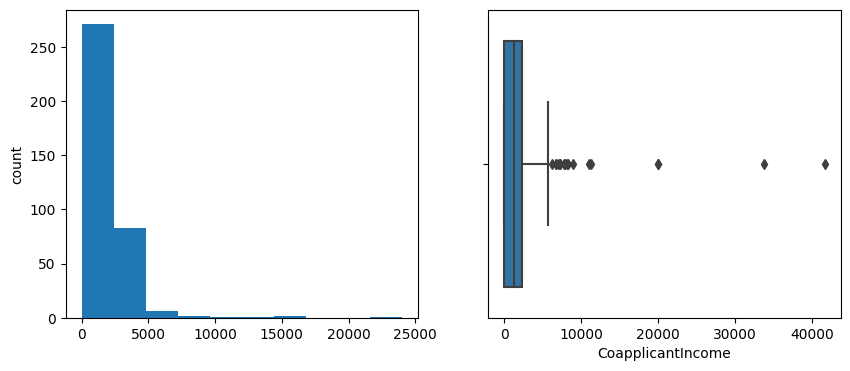

Skew: 2.22


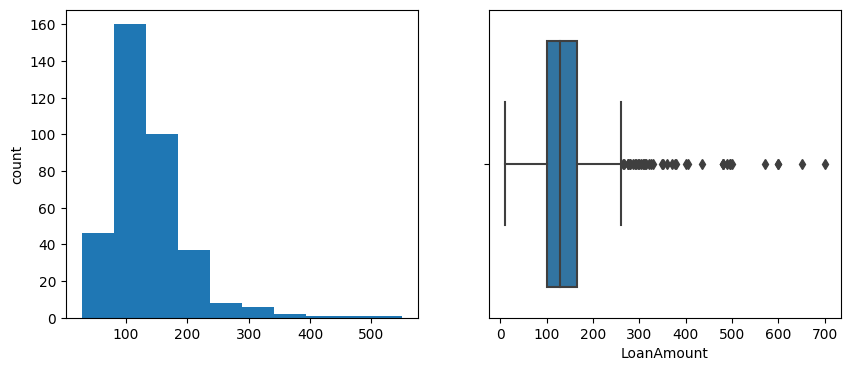

Skew: -2.68


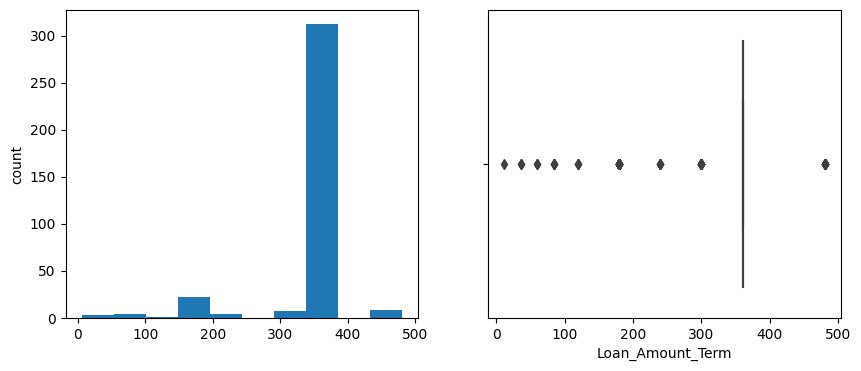

Skew: -1.72


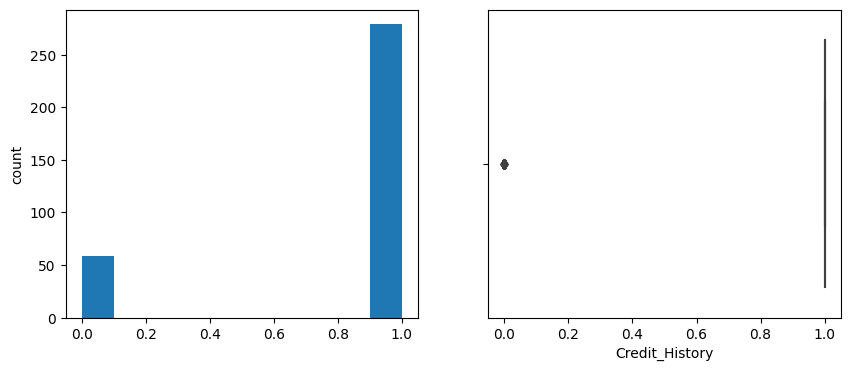

In [ ]:
num_col = data_test.select_dtypes(exclude =["object"]).columns
for col in num_col:
  print('Skew:',round(data_test[col].skew(),2))
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  data_test[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=data_train[col])
  plt.show()

**DATA PREPROCESSING**

Fill in the missing values - Train Dataset

In [5]:
#fill the median value for missing values in Loan amount and Loan term amount as it skewed data
data_train['LoanAmount'] = data_train['LoanAmount'].fillna(data_train['LoanAmount'].median())
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].median())

In [6]:
#fill the mode values in Gender,Married,Dependents,Self_Employed,Credit_History
data_train['Gender'] = data_train['Gender'].fillna(data_train['Gender'].mode()[0])
data_train['Married'] = data_train['Married'].fillna(data_train['Married'].mode()[0])
data_train['Dependents'] = data_train['Dependents'].fillna(data_train['Dependents'].mode()[0])
data_train['Self_Employed'] = data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0])
data_train['Credit_History'] = data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0])

In [7]:
#data_train['Married'].unique()
data_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
data_train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

**Label Encoding**

In [8]:
data_train.drop('Loan_ID',inplace = True, axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['Gender'] = le.fit_transform(data_train['Gender'])
data_train['Married'] = le.fit_transform(data_train['Married'])
data_train['Dependents'] = le.fit_transform(data_train['Dependents'])
data_train['Self_Employed'] = le.fit_transform(data_train['Self_Employed'])
data_train['Education'] = le.fit_transform(data_train['Education'])
data_train['Property_Area'] = le.fit_transform(data_train['Property_Area'])
data_train['Loan_Status'] = le.fit_transform(data_train['Loan_Status'])

In [ ]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [10]:
data_train= pd.get_dummies(data_train)

**Co-relation matrix**

<Axes: >

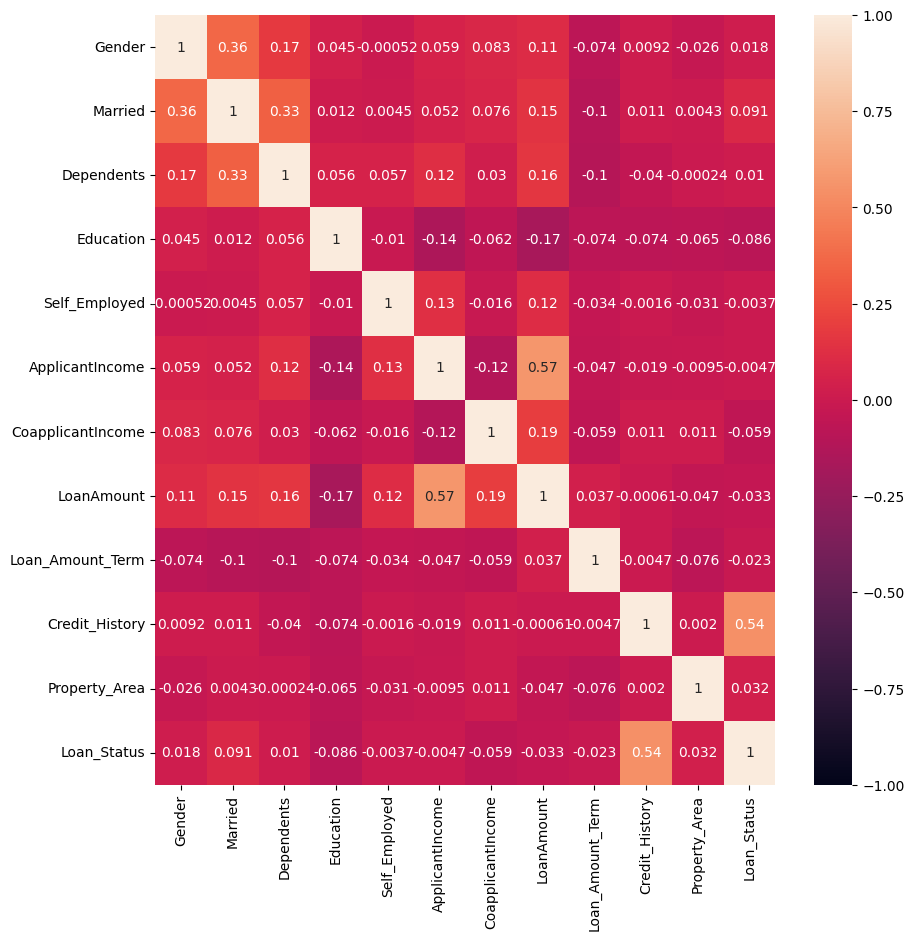

In [ ]:
plt.figure(figsize=(10,10))
matrix = data_train.corr(numeric_only=True)
sns.heatmap(matrix, annot = True,vmin=-1,vmax=1)

1) There is high corelation between Credit History and Loan Status

2) There is high corelation between Loan Amount and Applicant Income.

**Fill in the missing values - Test Dataset**

In [ ]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
#fill the median value for missing values in Loan amount and Loan term amount as it skewed data
data_test['LoanAmount'] = data_test['LoanAmount'].fillna(data_test['LoanAmount'].median())
data_test['Loan_Amount_Term'] = data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].median())

In [12]:
#fill the mode values in Gender,Married,Dependents,Self_Employed,Credit_History
data_test['Gender'] = data_test['Gender'].fillna(data_test['Gender'].mode()[0])
data_test['Dependents'] = data_test['Dependents'].fillna(data_test['Dependents'].mode()[0])
data_test['Self_Employed'] = data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0])
data_test['Credit_History'] = data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0])

**Label Encoding**

In [13]:
data_test.drop('Loan_ID',inplace = True, axis = 1)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_test['Gender'] = le.fit_transform(data_test['Gender'])
data_test['Married'] = le.fit_transform(data_test['Married'])
data_test['Dependents'] = le.fit_transform(data_test['Dependents'])
data_test['Self_Employed'] = le.fit_transform(data_test['Self_Employed'])
data_test['Education'] = le.fit_transform(data_test['Education'])
data_test['Property_Area'] = le.fit_transform(data_test['Property_Area'])

In [15]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


**One - hot encoding to change all the data type to numeric type**

In [16]:
data_test = pd.get_dummies(data_test)


**Corelation Matrix**

<Axes: >

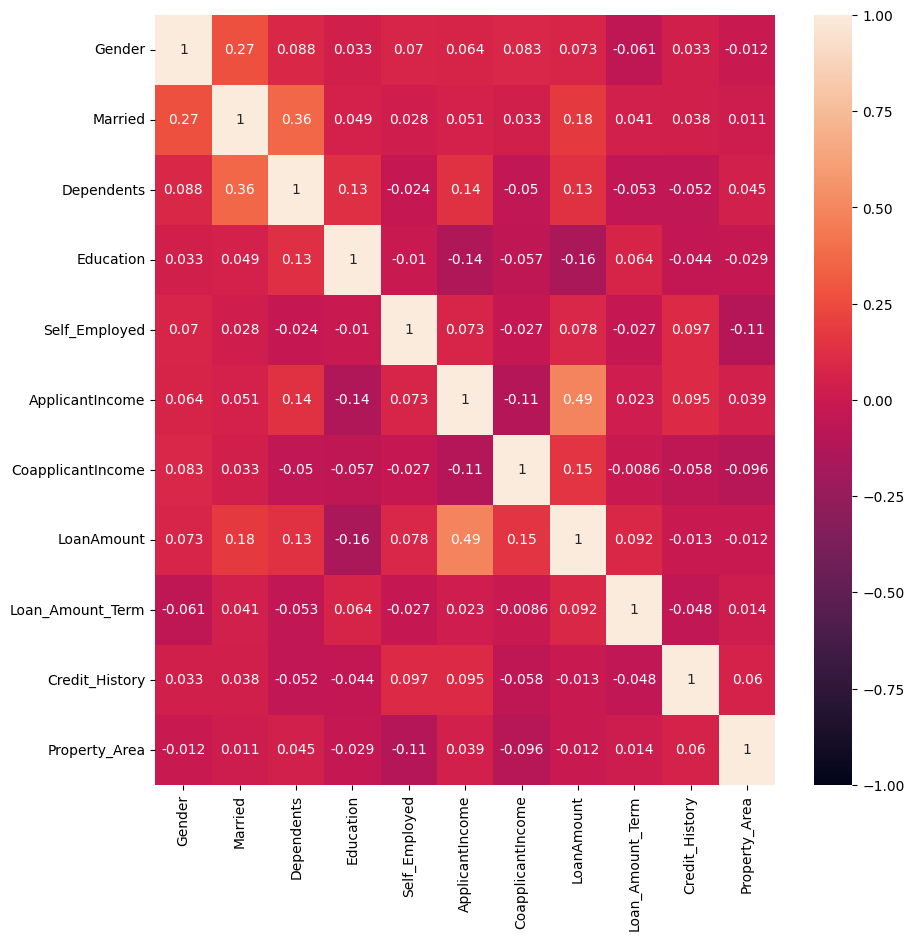

In [ ]:
plt.figure(figsize=(10,10))
matrix = data_test.corr(numeric_only=True)
sns.heatmap(matrix, annot = True,vmin=-1,vmax=1)

**DATA TRAINING - LOGISTIC REGRESSION MODEL**

In [17]:
y = data_train['Loan_Status']
X = data_train.drop('Loan_Status',axis = 1)

In [26]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
X_data = sscaler.fit_transform(X)
X_data = pd.DataFrame(X_data,columns=X.columns)

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)
lr = LogisticRegression()
lr_model = lr.fit(X_train,y_train)
y_prediction = lr_model.predict(X_test)

In [20]:
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
print('Accuracy using Logistic Regression =',accuracy_score(y_test,y_prediction))

Accuracy using Logistic Regression = 0.7886178861788617


**PREDICTING ON TEST DATASET**

In [22]:
y_prediction_test = lr_model.predict(data_test)

In [23]:
y_prediction_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

**Saving the predictions to csv format**

In [ ]:
data_submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
data_submission['Loan_Status']=y_prediction
data_submission['Loan_ID'] = data_test_copy['Loan_ID']
data_submission['Loan_Status'].replace(0,'N',inplace =True)
data_submission['Loan_Status'].replace(1,'Y',inplace =True)
pd.DataFrame(data_submission,columns=['Loan_ID','Loan_Status']).to_csv('submission_LR.csv',index=False)

**Startified K Fold**

In [30]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle = True)
for train_index, test_index in kf.split(X_data,y):
  print('n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X_data.iloc[train_index],X_data.iloc[test_index]
  ytr,yvl = y.iloc[train_index],y.iloc[test_index]
  model_lr_sk = LogisticRegression(random_state =1)
  model_lr_sk.fit(xtr,ytr)
  pred_test = model_lr_sk.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('Accuracy score',score)
  i+=1
pred_test = model_lr_sk.predict(data_test)
#pred = model_lr_sk.predict_proba(xvl)[:,1]



n1 of kfold 5
Accuracy score 0.8130081300813008
n2 of kfold 5
Accuracy score 0.8373983739837398
n3 of kfold 5
Accuracy score 0.7967479674796748
n4 of kfold 5
Accuracy score 0.8211382113821138
n5 of kfold 5
Accuracy score 0.7950819672131147


In [31]:
pred_test

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [32]:
data_submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
data_submission['Loan_Status']=pred_test
data_submission['Loan_ID'] = data_test_copy['Loan_ID']
data_submission['Loan_Status'].replace(0,'N',inplace =True)
data_submission['Loan_Status'].replace(1,'Y',inplace =True)
pd.DataFrame(data_submission,columns=['Loan_ID','Loan_Status']).to_csv('submission_Stratified.csv',index=False)

In [ ]:
print(" Score in Logistic Regression after Cross Validation= ",np.mean(cv_val_score))

 Score in Logistic Regression after Cross Validation=  0.812734693877551


In [ ]:
confusion_matrix(y_test,y_prediction)

array([[18, 25],
       [ 1, 79]])

**KNN model**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [48]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
  model_knn = classifier.fit(X_train,y_train)
  y_prediction_knn = model_knn.predict(X_test)
  acc = accuracy_score(y_test,y_prediction_knn)
  print('Neighbor',k,'= :',acc)
  metric_k.append(acc)

Neighbor 3 = : 0.6178861788617886
Neighbor 4 = : 0.5609756097560976
Neighbor 5 = : 0.5772357723577236
Neighbor 6 = : 0.5691056910569106
Neighbor 7 = : 0.5853658536585366
Neighbor 8 = : 0.5853658536585366
Neighbor 9 = : 0.5772357723577236
Neighbor 10 = : 0.5609756097560976
Neighbor 11 = : 0.6016260162601627
Neighbor 12 = : 0.5853658536585366
Neighbor 13 = : 0.5934959349593496
Neighbor 14 = : 0.5853658536585366


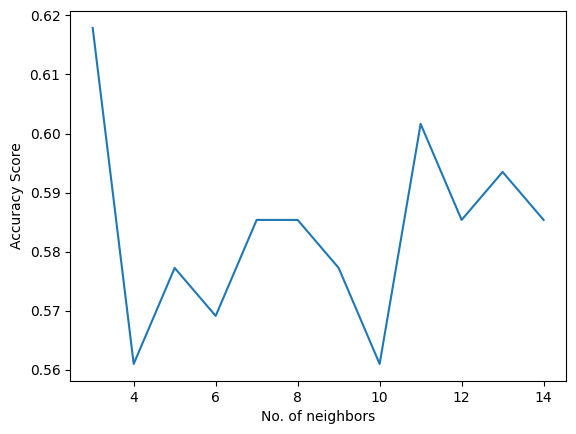

In [49]:
plt.plot(neighbors,metric_k,)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')
plt.show()

In [50]:
#predicting with 3 neighbors
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
model_knn = classifier.fit(X_train,y_train)
y_prediction_knn = model_knn.predict(X_test)

In [51]:
y_prediction_knn

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
print(" Accuracy Score of KNN model =",accuracy_score(y_test,y_prediction_knn))

 Accuracy Score of KNN model = 0.6178861788617886


**TESTING ON TEST DATA**

In [52]:
y_prediction_knn_test = model_knn.predict(data_test)

In [53]:
y_prediction_knn_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

**SAVING PREDICTION TO CSV FORMAT**

In [54]:
data_submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
data_submission['Loan_Status']=y_prediction_knn_test
data_submission['Loan_ID'] = data_test_copy['Loan_ID']
data_submission['Loan_Status'].replace(0,'N',inplace =True)
data_submission['Loan_Status'].replace(1,'Y',inplace =True)
pd.DataFrame(data_submission,columns=['Loan_ID','Loan_Status']).to_csv('submission_KNN.csv',index=False)

In [ ]:
cv_val_score_knn = cross_val_score(model_knn,X_train,y_train,cv=k)
print(" Score in KNN after Cross Validation= ",np.mean(cv_val_score_knn))

 Score in KNN after Cross Validation=  0.7759183673469388


In [ ]:
confusion_matrix(y_test,y_prediction_knn)

array([[ 9, 34],
       [13, 67]])

**SVM model**

In [ ]:
from sklearn.svm import SVC
svm_cls = SVC(kernel='linear')
model_svm_li = svm_cls.fit(X_train,y_train)
y_prediction_svm_li = model_svm_li.predict(X_test)

In [ ]:
y_prediction_svm_li

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print(" Accuracy Score of SVM model (linear kernel)",accuracy_score(y_test,y_prediction_svm_li))

 Accuracy Score of SVM model (linear kernel) 0.7967479674796748


**TESTING OF TEST DATASET**

In [ ]:
y_prediction_svm_li = model_svm_li.predict(data_test)

In [ ]:
y_prediction_svm_li

**Saving the prediction to .csv format**

In [ ]:
data_submission_SVM = pd.read_csv('/content/sample_submission_49d68Cx.csv')
data_submission_SVM['Loan_Status']=y_prediction_svm_li
data_submission_SVM['Loan_ID'] = data_test_copy['Loan_ID']
data_submission_SVM['Loan_Status'].replace(0,'N',inplace =True)
data_submission_SVM['Loan_Status'].replace(1,'Y',inplace =True)
pd.DataFrame(data_submission_SVM,columns=['Loan_ID','Loan_Status']).to_csv('submission_SVM.csv',index=False)

**SVM (Kernet = rbf)**

In [55]:
from sklearn.svm import SVC
svm_cls = SVC(kernel='rbf')
model_svm_rbf = svm_cls.fit(X_train,y_train)
y_prediction_svm_rbf = model_svm_rbf.predict(X_test)

In [56]:
y_prediction_svm_rbf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**TESTING ON TEST DATASET**

In [57]:
y_prediction_svm_rbf_test = model_svm_rbf.predict(data_test)

In [58]:
y_prediction_svm_rbf_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**SAVING PREDICTION TO CSV FORMAT**

In [59]:
data_submission_SVM = pd.read_csv('/content/sample_submission_49d68Cx.csv')
data_submission_SVM['Loan_Status']=y_prediction_svm_rbf_test
data_submission_SVM['Loan_ID'] = data_test_copy['Loan_ID']
data_submission_SVM['Loan_Status'].replace(0,'N',inplace =True)
data_submission_SVM['Loan_Status'].replace(1,'Y',inplace =True)
pd.DataFrame(data_submission_SVM,columns=['Loan_ID','Loan_Status']).to_csv('submission_SVM_RBF.csv',index=False)

In [ ]:
print(" Accuracy Score of SVM model(rbf kernel) =",accuracy_score(y_test,y_prediction_svm_rbf))

 Accuracy Score of SVM model = 0.6504065040650406


In [ ]:
cv_val_score_svm_rbf = cross_val_score(model_svm_rbf,X_train,y_train,cv=k)
print(" Score in SVM model(rbf kernel) after Cross Validation= ",np.mean(cv_val_score_svm_rbf))

 Score in SVM model(rbf kernel) after Cross Validation=  0.802530612244898


**DECISION TREE MODEL**

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier()
model_DT = classifier_DT.fit(X_train,y_train)
y_prediction_DT = model_DT.predict(X_test)

In [34]:
y_prediction_DT

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [35]:
print(" Accuracy Score of Decision Tree Model) =",accuracy_score(y_test,y_prediction_DT))

 Accuracy Score of Decision Tree Model) = 0.7235772357723578


**TESTING ON TEST DATASET**

In [36]:
y_prediction_DT_test = model_DT.predict(data_test)

In [37]:
y_prediction_DT_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

**Saving predictions in Decicsion Tree model to CSV format file**

In [38]:
data_submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
data_submission['Loan_Status']=y_prediction_DT_test
data_submission['Loan_ID'] = data_test_copy['Loan_ID']
data_submission['Loan_Status'].replace(0,'N',inplace =True)
data_submission['Loan_Status'].replace(1,'Y',inplace =True)
pd.DataFrame(data_submission,columns=['Loan_ID','Loan_Status']).to_csv('submission_DecisionTree.csv',index=False)

**Random Forest Classifier Model**

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(n_estimators = 12, random_state=42)
model_rf = rf_cls.fit(X_train,y_train)
y_prediction_rf = model_rf.predict(X_test)

In [40]:
y_prediction_rf


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [41]:
print(" Accuracy Score of Random Forest Model =",accuracy_score(y_test,y_prediction_rf))

 Accuracy Score of Random Forest Model = 0.7398373983739838


**TESTING ON TEST DATASET**

In [42]:
y_prediction_rf_test = model_rf.predict(data_test)

In [43]:
y_prediction_rf_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

**SAving Predictions using Random Forest to csv format**

In [45]:
data_submission_SVM = pd.read_csv('/content/sample_submission_49d68Cx.csv')
data_submission_SVM['Loan_Status']=y_prediction_rf_test
data_submission_SVM['Loan_ID'] = data_test_copy['Loan_ID']
data_submission_SVM['Loan_Status'].replace(0,'N',inplace =True)
data_submission_SVM['Loan_Status'].replace(1,'Y',inplace =True)
pd.DataFrame(data_submission_SVM,columns=['Loan_ID','Loan_Status']).to_csv('submission_RandomForest.csv',index=False)

**SUMMARY OF ALL THE MODELS USED USING ACCURACY ON TRAINING DATA**

In [ ]:
print('Accuracy using Logistic Regression =',accuracy_score(y_test,y_prediction))
print(" Accuracy Score of KNN model =",accuracy_score(y_test,y_prediction_knn))
print(" Accuracy Score of SVM model (kernel = linear)=",accuracy_score(y_test,y_prediction_svm_li))
print(" Accuracy Score of SVM model(rbf kernel) =",accuracy_score(y_test,y_prediction_svm_rbf))
print(" Accuracy Score of Decision Tree Model) =",accuracy_score(y_test,y_prediction_DT))
print(" Accuracy Score of Random Forest Model =",accuracy_score(y_test,y_prediction_rf))

Accuracy using Logistic Regression = 0.7886178861788617
 Accuracy Score of KNN model = 0.6178861788617886
 Accuracy Score of SVM model (kernel = linear)= 0.7967479674796748
 Accuracy Score of SVM model(rbf kernel) = 0.6504065040650406
 Accuracy Score of Decision Tree Model) = 0.7317073170731707
 Accuracy Score of Random Forest Model = 0.7398373983739838
